# Repo issue creation analysis

In [30]:
target_repo = "Uberi/speech_recognition"  # creator/repo (get it from URL)

## Retrieving data from GitHub API

In [31]:
# Get number of issues to analyze
import urllib.request
import json
url_to_query = "https://api.github.com/repos/" + \
    target_repo+"/issues?state=all&per_page=1&page=1"
with urllib.request.urlopen(url_to_query) as url:
    data = json.loads(url.read().decode())
    last_issue_number = data[0]["number"]
number_of_pages_to_query = int(last_issue_number / 100) + 1

print(last_issue_number)

495


In [32]:
# Creates list of fields "created_at" and "number"
import time  # to handle API bloating
issue_number = []
created_at = []

i = 1
while i < (number_of_pages_to_query + 1):
    time.sleep(5)
    url_to_query = "https://api.github.com/repos/"+target_repo + \
        "/issues?state=all&per_page=100&page=" + str(i)
    try:
        with urllib.request.urlopen(url_to_query) as url:
            data = json.loads(url.read().decode())
        for issue in data:
            issue_number.append(issue["number"])
            created_at.append(issue["created_at"])
    except:
        pass
    i += 1
    print(str(len(created_at)) + ' out of ' + str(last_issue_number))

100 out of 495
200 out of 495
300 out of 495
400 out of 495
494 out of 495


In [33]:
# Parse to datetimes, reverse list
import datetime
# we added data from most recent to oldest; we revert
created_at = list(reversed(created_at))

# "2018-03-12T10:12:45Z" -> "%Y-%m-%dT%H:%M:%SZ"
created_at_dates = []
for element in created_at:
    element = datetime.datetime.strptime(element, '%Y-%m-%dT%H:%M:%SZ')
    created_at_dates.append(element)
print(type(created_at_dates[0]))

<class 'datetime.datetime'>


# Plotting issue creation rhythm

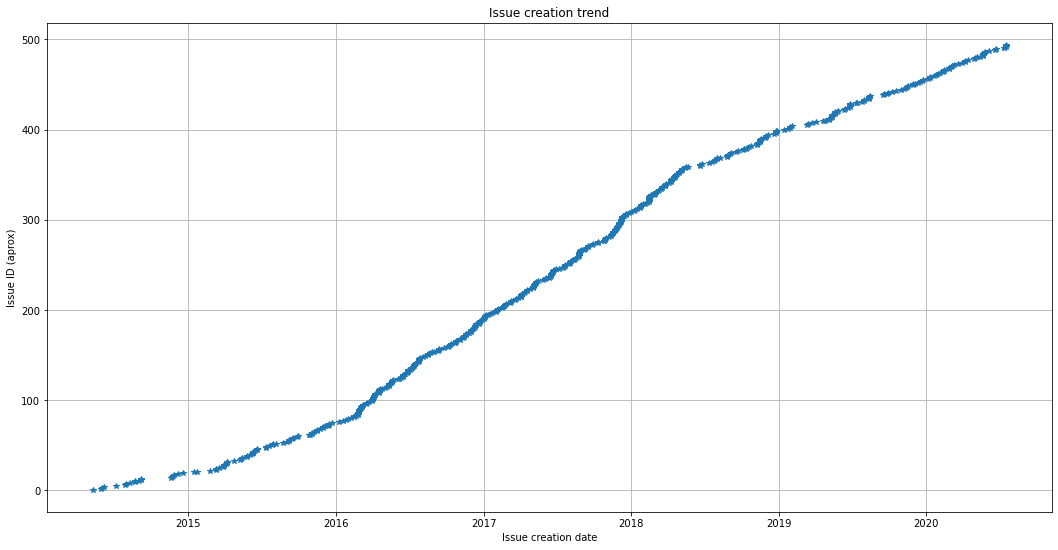

In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

acumulated_number_of_issues = []
j = 1
dims = len(created_at)+1
while j < dims:
    acumulated_number_of_issues.append(j)
    j += 1

fig, ax = plt.subplots(figsize=(18, 9))
fig.patch.set_facecolor('white')  # background of the frame
ax.plot(created_at_dates, acumulated_number_of_issues, '*')
ax.set(xlabel='Issue creation date', ylabel='Issue ID (aprox)',
       title='Issue creation trend')
ax.grid()

plt.show()

## Zoom into the trend


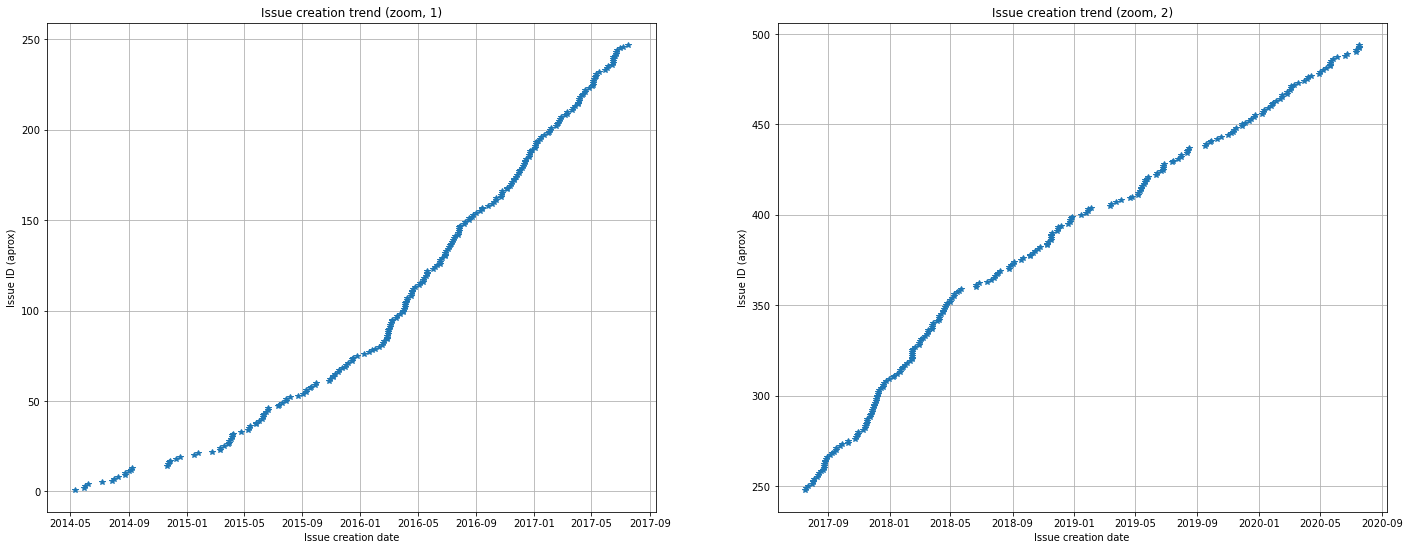

In [35]:
# Zoom-in to two halves (derivative changes on visual inspection?)

half = int(len(created_at_dates)/2)

fig, ax = plt.subplots(1, 2, figsize=(24, 9))
fig.patch.set_facecolor('white')

ax[0].plot(created_at_dates[0:half], acumulated_number_of_issues[0:half], '*')
ax[0].set(xlabel='Issue creation date', ylabel='Issue ID (aprox)',
          title='Issue creation trend (zoom, 1)')
ax[0].grid()

ax[1].plot(created_at_dates[half:], acumulated_number_of_issues[half:], '*')
ax[1].set(xlabel='Issue creation date', ylabel='Issue ID (aprox)',
          title='Issue creation trend (zoom, 2)')
ax[1].grid()

# fig.savefig("test.png")
plt.show()

# Optional: export the data to CSV

In [36]:
import csv

repo = target_repo.split('/')[-1]
output_filename = repo + '_issue_creation_timestamps.csv'
with open(output_filename, mode='w') as output_file:
    output_writer = csv.writer(
        output_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    output_writer.writerow(["Creation date", "Issue number"])
    for element in zip(created_at_dates, acumulated_number_of_issues):
        output_writer.writerow(element)